In [644]:
# src: https://www.kaggle.com/uciml/restaurant-data-with-consumer-ratings?select=chefmozcuisine.csv
# Use this data to create a restaurant recommender or determine 
# which restaurants a person is most likely to visit
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [666]:
rating = pd.read_csv('Data/rating_final.csv')

In [667]:
mean = rating.groupby('placeID').mean()
mean['placeID'] = mean.index
mean.reset_index(drop=True,inplace=True)
ids = rating[['userID','placeID']]
mean = mean.join(ids.set_index('placeID'),on='placeID')

In [668]:
res_cuisine = pd.read_csv('Data/chefmozcuisine.csv')

In [669]:
res_cuisine = res_cuisine.groupby(['placeID'])['Rcuisine'].apply(sorted)

In [670]:
res_loc = pd.read_csv('Data/geoplaces2.csv')

In [671]:
res_loc.drop(['the_geom_meter','address','fax','url','zip','franchise','city','state','country'],axis=1,inplace=True)

In [672]:
res_payment = pd.read_csv('Data/chefmozaccepts.csv')

In [673]:
res_payment = res_payment.groupby(['placeID'])['Rpayment'].apply(sorted)

In [674]:
res_parking = pd.read_csv('Data/chefmozparking.csv')

In [675]:
res_parking = res_parking.groupby(['placeID'])['parking_lot'].apply(sorted)

In [676]:
table = pd.DataFrame(res_cuisine).join([res_payment])

In [678]:
table = table.join([res_parking])

In [657]:
index = table.index

In [681]:
new_index = np.arange(0,len(index))

In [682]:
table['index'] = new_index

In [ ]:
table['placeID'] = table.index

In [687]:
table = table.set_index('index')

In [689]:
table = table.join(res_loc.set_index('placeID'),on=table['placeID'])

In [690]:
table = table.join(mean.set_index('placeID'), on = 'placeID')

In [691]:
table = table.fillna('unknown')

In [692]:
restaurant = table.copy()

In [478]:
user_profile = pd.read_csv('Data/userprofile.csv')

In [606]:
user_cuisine = pd.read_csv('Data/usercuisine.csv')

In [ ]:
user_cuisine = user_cuisine.groupby(['userID'])['Rcuisine'].apply(sorted)

In [607]:
user_payment = pd.read_csv('Data/userpayment.csv')

In [ ]:
user_payment = user_payment.groupby(['userID'])['Upayment'].apply(sorted)

In [ ]:
user_profile = user_profile.join(user_cuisine,on='userID')
user_profile = user_profile.join(user_payment,on='userID')

In [518]:
user_profile.drop(['marital_status','hijos','birth_year','color','weight','height','personality','interest'],axis=1,inplace=True)

Index(['userID', 'latitude', 'longitude', 'smoker', 'drink_level',
       'dress_preference', 'ambience', 'transport', 'interest', 'religion',
       'activity', 'budget'],
      dtype='object')

In [525]:
def smoking(x):
    if(x == 'false'):
        return 0
    else:
        return 1

In [531]:
def dressing(x):
    if((x=='formal') | (x=='elegant')):
        return 'formal'
    elif(x=='informal'):
        return 'informal'
    else:
        return 'no preference'

In [533]:
user_profile['dress_preference'] = user_profile.apply(lambda x : dressing(x['dress_preference']),axis=1)

In [ ]:
user_profile['smoker'] = user_profile.apply(lambda x : smoking(x['smoker']),axis=1)

In [538]:
ambience_dummy = pd.get_dummies(user_profile['ambience'],drop_first=True)

In [543]:
user_profile = pd.concat([user_profile.drop('ambience',axis=1),ambience_dummy],axis=1)

In [546]:
drinking_dummy = pd.get_dummies(user_profile['drink_level'],drop_first=True)

In [547]:
user_profile = pd.concat([user_profile.drop('drink_level',axis=1),drinking_dummy],axis=1)

In [554]:
dressing_dummy = pd.get_dummies(user_profile['dress_preference'],drop_first=True)

In [555]:
user_profile = pd.concat([user_profile.drop('dress_preference',axis=1),dressing_dummy],axis=1)

In [560]:
transport_dummy = pd.get_dummies(user_profile['transport'],drop_first=True)

In [561]:
user_profile = pd.concat([user_profile.drop('transport',axis=1),transport_dummy],axis=1)

In [569]:
religion_dummy = pd.get_dummies(user_profile['religion']).drop('none',axis=1)

In [570]:
user_profile = pd.concat([user_profile.drop('religion',axis=1),religion_dummy],axis=1)

In [575]:
job_dummy = pd.get_dummies(user_profile['activity'],drop_first=True)

In [576]:
user_profile = pd.concat([user_profile.drop('activity',axis=1),job_dummy],axis=1)

In [589]:
budget_dummy = pd.get_dummies(user_profile['budget'],drop_first=True,columns=['budget_high','budget_low','budget_medium'])

In [594]:
user_profile = pd.concat([user_profile,budget_dummy],axis=1)

In [765]:
table = user_profile.join(restaurant.set_index('userID'),on='userID',lsuffix='_user')

In [733]:
table.columns

Index(['userID', 'latitude_user', 'longitude_user', 'smoker', 'family',
       'friends', 'solitary', 'casual drinker', 'social drinker', 'informal',
       'no preference', 'car owner', 'on foot', 'public', 'Catholic',
       'Christian', 'Jewish', 'Mormon', 'professional', 'student',
       'unemployed', 'working-class', 'high', 'low', 'medium', 'Rcuisine_user',
       'Upayment', 'Rcuisine', 'Rpayment', 'parking_lot', 'placeID',
       'latitude', 'longitude', 'name', 'alcohol', 'smoking_area',
       'dress_code', 'accessibility', 'price', 'Rambience', 'area',
       'other_services', 'rating', 'food_rating', 'service_rating',
       'Same_Cuisine'],
      dtype='object')

In [766]:
def find(user,res):
    for u in user:
        for r in res:
            if u == r:
                return 1
    return 0

In [767]:
table['Same_Cuisine'] = table.apply(lambda x : find(x['Rcuisine_user'], x['Rcuisine']), axis = 1)

In [768]:
table['price'].value_counts()

medium    462
low       276
high      135
Name: price, dtype: int64

In [769]:
price_dummy = pd.get_dummies(table['price'],drop_first=True)
price_dummy = price_dummy.rename(columns={'low':'price_low',
                   'medium':'price_medium'})

In [770]:
table = pd.concat([table.drop('price',axis=1),price_dummy],axis=1)

In [771]:
table.transpose()'latitude_user','longitude_user','smoker'

,0,0,0,0,1,1,1,1,1,1,...,136,136,136,136,136,136,136,137,137,137
userID,U1001,U1001,U1001,U1001,U1002,U1002,U1002,U1002,U1002,U1002,...,U1137,U1137,U1137,U1137,U1137,U1137,U1137,U1138,U1138,U1138
latitude_user,22.14,22.14,22.14,22.14,22.1501,22.1501,22.1501,22.1501,22.1501,22.1501,...,22.1448,22.1448,22.1448,22.1448,22.1448,22.1448,22.1448,22.1529,22.1529,22.1529
longitude_user,-100.979,-100.979,-100.979,-100.979,-100.983,-100.983,-100.983,-100.983,-100.983,-100.983,...,-100.945,-100.945,-100.945,-100.945,-100.945,-100.945,-100.945,-100.94,-100.94,-100.94
smoker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
family,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0
friends,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
solitary,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
casual drinker,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
social drinker,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
informal,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [788]:
X = table.drop(['rating','other_services','area','Rambience','accessibility','dress_code','smoking_area','alcohol',
               'name','placeID','parking_lot','Rpayment','Rcuisine','Upayment','Rcuisine_user','userID','food_rating',
               'service_rating'], axis=1)
y = table['rating']

In [789]:
from sklearn.model_selection import train_test_split

In [790]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [791]:
from sklearn.linear_model import LinearRegression

In [792]:
model = LinearRegression()

In [793]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [794]:
prediction = model.predict(X_test)

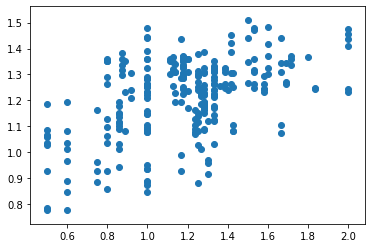

In [795]:
plt.scatter(y_test,prediction)

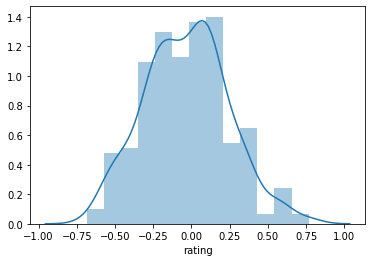

In [796]:
sns.distplot((y_test-prediction))

In [785]:
cdf = pd.DataFrame(model.coef_, X.columns, columns=['Coeff'])

In [786]:
cdf

,Coeff
latitude_user,-0.009573
longitude_user,-0.005336
smoker,-0.028471
family,-0.056669
friends,-0.067348
solitary,-0.074707
casual drinker,0.003573
social drinker,0.005488
informal,-0.007566
no preference,-0.018539
